In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
import json
import time
import warnings
import re
%matplotlib inline

## Gathering Data

In [87]:
# Importing the first dataset

twitter_Archives = pd.read_csv('twitter-archive-enhanced.csv')

In [88]:
# Downloading the 2nd dataset

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(os.path.join('image-predictions.tsv'), 'wb') as file:
    file.write(r.content)

In [89]:
image_predictions = pd.read_csv('image-predictions.tsv', delimiter='\t')

In [90]:
# Creating an API object

consumer_key = 'Bcbi6JrKebYYcYAeahW0l1q75'
consumer_secret = 'dhBAeTnWOSLmAHSwbu5QEur3UoxuRj4ZlVgvWroHk69zfXBrOB'
access_token = '1381268725647749122-R4hHYCPEpiWGFtXcGoKeGN02kDAyDa'
access_secret = '1w7XfwvvuxI8oU6snb5u6jCAz15IKBwj38rMa3p1oyvis'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
print(auth)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
print(api)

In [91]:
# gather the necessary attributes and store them in a file
listOf_tweets = []
# Tweet id's that are not found are stored in the list below
missing_tweets_id = []

start = time. time()
for tweet_id in twitter_Archives['tweet_id']:
    try:
        listOf_tweets.append(api.get_status(tweet_id))
        #print('successful', tweet_id)
    except Exception as e:
        missing_tweets_id.append(tweet_id) 
        #print('failed', tweet_id)
end = time. time()

# displaces time taken to gather data using api

print('Time taken to get there data:', (end - start) / 60, 'minutes') 

Rate limit reached. Sleeping for: 727
Rate limit reached. Sleeping for: 728
Time taken to get there data: 31.954141553243 minutes


In [92]:
# Displaying the number of tweets matched with their Tweet_id and unmatched tweets.
print("The number of tweet_id matched with tweets:", len(listOf_tweets))
print("The number of tweet_id not matched with tweets:", len(missing_tweets_id))

The number of tweet_id matched with tweets: 2327
The number of tweet_id not matched with tweets: 29


In [93]:
# Adding the JSON tweepy status downloaded into a list.
json_list = []
for all_tweets in listOf_tweets:
    json_list.append(all_tweets)

In [94]:
# Read file and save it into a txt file.
with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(json_list, indent = 4))

In [95]:
# Gathering the relevent data from the saved JSON file.
json_dataList = []
with open('tweet_json.txt', encoding = 'utf-8') as json_file:
    tweets = json.load(json_file)
    for n in tweets:
        tweet_id = n['id']
        favorite_count = n['favorite_count']
        retweet_count = n['retweet_count']
        json_dataList.append({'tweet_id' : tweet_id,
                             'favorite_count' : favorite_count,
                             'retweet_count' : retweet_count,
                             })
        json_data_df = pd.DataFrame(json_dataList, columns = ['tweet_id', 'favorite_count', 'retweet_count',])
        

## Assess Data

In [11]:
twitter_Archives.head();

In [12]:
image_predictions.head();

In [13]:
json_data_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33663,6961
1,892177421306343426,29205,5266
2,891815181378084864,21949,3463
3,891689557279858688,36751,7187
4,891327558926688256,35151,7706


In [14]:
twitter_Archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
sum(twitter_Archives.in_reply_to_status_id.isnull())


2278

In [30]:
sum(twitter_Archives.in_reply_to_user_id.isnull())

2278

In [31]:
sum(twitter_Archives.retweeted_status_id.isnull())

2175

In [32]:
sum(twitter_Archives.retweeted_status_user_id.isnull())

2175

In [33]:
sum(twitter_Archives.retweeted_status_timestamp.isnull())

2175

In [38]:
twitter_Archives.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [40]:
len(twitter_Archives.rating_numerator.unique())

40

In [45]:
twitter_Archives.name.unique();

In [42]:
len(twitter_Archives.name.unique())

957

In [17]:
twitter_Archives.sample(15);

In [97]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [98]:
json_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


### Quality issues

#### This is observed in the twitter_Archives table

- This a lot of missing values from this columns
    - in_reply_to_status_id
    * in_reply_to_user_id
    *  retweeted_status_id
    * retweeted_status_user_id
    * retweeted_status_timestamp
- Other tweet id's are missing images
- Some tweets have been deleted
- some Dog names are incorrect
- Extra characters after '&'
- Dataset contains retweets

#### This is observed in the image_predictions.tsv table

- irreconcilable dog-breed-name cases in column p1, p2 and p3

#### This is observed in the tweet_json.txt table

- The data is not complete

### Tidiness issues

- json_data_df should be part of twitter_archive table
- multiple dog stages name in a single row

## Cleaning Data

In [99]:
# Create copies of original DataFrames to work off of

twitter_Archives_clean = twitter_Archives.copy()
image_predictions_clean = image_predictions.copy()
json_data_df_clean = json_data_df.copy()

#### Quality issues

##### Define

For the project we only want the original ratings that have images, data related to retweets we don't need. this columns will be dropped. retweeted_status_user_id, retweeted_status_id and also retweeted_status_timestamp

##### Code

In [100]:
twitter_Archives_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [101]:
twitter_Archives_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [102]:
twitter_Archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


##### Define

Will be changing these columns datatype to string the columns are in_reply_to_status_id and in_reply_to_user_id also change 'timestamp' to datetime datatype. Since they in the incorrect datatype.

##### Code

In [140]:
twitter_Archives_clean['in_reply_to_status_id'] = twitter_Archives_clean.in_reply_to_status_id.astype(str)
twitter_Archives_clean['in_reply_to_user_id'] = twitter_Archives_clean.in_reply_to_user_id.astype(str)
twitter_Archives_clean['timestamp'] = pd.to_datetime(twitter_Archives_clean['timestamp'])

##### Test

In [141]:
twitter_Archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 13 columns):
tweet_id                 1985 non-null int64
in_reply_to_status_id    1985 non-null object
in_reply_to_user_id      1985 non-null object
timestamp                1985 non-null datetime64[ns]
source                   1985 non-null object
text                     1985 non-null object
expanded_urls            1985 non-null object
rating_numerator         1985 non-null int64
rating_denominator       1985 non-null int64
name                     1985 non-null object
favorite_count           1985 non-null int64
retweet_count            1985 non-null int64
dog_class                1985 non-null object
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 217.1+ KB


##### Define

As we can see from the dataset twitter_Archives the dog names are incorrect as this could be because the data was ectracted programmatically, these dog names like 'my', 'by', 'an' etc. Lets take note of the fact that the incorrect dog names first letter is in lowercase and we will need to treat the dog named 'O' specially.

##### Code

In [105]:
# extracting the dog names that start with a lowercase letter.

incorrect_dog_names = [name for name in twitter_Archives_clean.name.unique() if name.islower()]


In [96]:
incorrect_dog_names;

In [106]:
# store all incorrect dog names indices in a list

incorrect_dog_names_index = []
for dogName in incorrect_dog_names:
    for index in twitter_Archives_clean[twitter_Archives_clean.name == dogName].index:
        incorrect_dog_names_index.append(index)
        
# We will replace the incorrect dog names wilh 'Not known'

for index in incorrect_dog_names_index:
    twitter_Archives_clean.loc[index, 'name'] = 'Not Known'

In [107]:
# lets look into the dog named 'O'

twitter_Archives_clean.query('name == "O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,nan,nan,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [108]:
# Querying the text data for this dag

twitter_Archives_clean.query('name == "O"').text.values[0]

"This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC"

In [109]:
# change the dog's name to it's correct name which is "O'Malley"

twitter_Archives_clean.loc[775, 'name'] = "O'Malley"

##### Test

In [110]:

[name for name in twitter_Archives_clean.name.unique() if name != 'Not known' and name.islower()]

[]

In [111]:
assert twitter_Archives_clean.loc[775]['name'] != 'O'

#### Define

As stated for this project we don't need retweets, will be droping all retweets.

##### Code

In [112]:
# extracting retweets to be dropped

drop_retweets = twitter_Archives_clean[twitter_Archives_clean.text.str.startswith('RT')]
drop_retweets;

In [113]:
twitter_Archives_clean.drop(retweets.index, inplace=True)

##### Test

In [114]:
twitter_Archives_clean[twitter_Archives_clean.text.str.startswith('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Define

Notice that some tweet_id's don't have images here will be dropping those tweet id's with no images.

##### Code

In [115]:
# Extracting the data of tweet_id'd with no images

tweet_id_no_image = twitter_Archives_clean[~twitter_Archives_clean.tweet_id.isin(image_predictions_clean.tweet_id)]
tweet_id_no_image;

In [116]:
twitter_Archives_clean.drop(tweet_id_no_image.index, inplace=True)

#### Test

In [117]:
twitter_Archives_clean[~twitter_Archives_clean.tweet_id.isin(image_predictions_clean.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Tidiness issue

##### Define

We are doing to merge twitter_Archives and json_data_df tables into one talble.

##### Code

In [142]:
twitter_Archives_clean = pd.merge(twitter_Archives_clean, json_data_df_clean)

##### Test

In [143]:
twitter_Archives_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_class
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,33663,6961,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,29190,5266,None


#### Quality issue

##### Define

We saw when collecting 3rd data set some tweets have been deleted and we stored them in missing_tweet_id. We will exclude this tweets from our analysis by deleting them.

##### Code

This issue have been fixed when we merged our 2 datasets 'twitter_Archives' and 'json_data_df'

##### Define 

Some dog breed names have start will uppercase and lowercase and this cause incosistancy. We will change all dog bread names to lowercase.

##### Code 

In [58]:
image_predictions_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [120]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

##### Test

In [121]:
image_predictions_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


##### Define

Remove extra characters after '&' in twitter_archive_clean['text'].

##### Code 

In [122]:
twitter_Archives_clean['text'] = twitter_Archives_clean['text'].str.replace('&amp;', '&')

##### Test

In [123]:
twitter_Archives_clean[twitter_Archives_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


#### Tidiness issue

##### Define

We will reduce four colums of dog types to one column in twitter_archive table so that (doggo, floofer, pupper and puppo) are not column headers. It is worth noting that some rows have more than one dog stages because some tweets have more than one dog in a single image. An example is the tweet with id 733109485275860992 and url. To fix this we will store both data in the same column with comma as a delimiter

##### Code

In [124]:
# One of the tweets with multiple dog stages

twitter_Archives_clean.query('tweet_id == 733109485275860992')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
834,733109485275860992,nan,nan,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None,49164,15438


In [125]:
twitter_Archives_clean.query('tweet_id == 733109485275860992').text.values[0]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [126]:
# merging four column dog types to on cloumn dog_class

twitter_Archives_clean['dog_class'] = twitter_Archives_clean[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
twitter_Archives_clean['dog_class'] = twitter_Archives_clean['dog_class'].str.replace(r'(None,)', repl='')
twitter_Archives_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

##### Test

In [127]:
twitter_Archives_clean.query('tweet_id == 733109485275860992')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_class
834,733109485275860992,nan,nan,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,49164,15438,"pupper,doggo"


In [130]:
twitter_Archives_clean.sample(10);

## Storing Data

Merge twitter_Archives and image_prediction. Finally, store the resulting dataframe in a file named twitter_Archives_master.csv

In [144]:
twitter_Archives_master = twitter_Archives_clean.merge(image_predictions_clean)

In [145]:
twitter_Archives_master.to_csv('twitter_Archives_master.csv', index=False)

In [146]:
twitter_Archives_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 24 columns):
tweet_id                 1985 non-null int64
in_reply_to_status_id    1985 non-null object
in_reply_to_user_id      1985 non-null object
timestamp                1985 non-null datetime64[ns]
source                   1985 non-null object
text                     1985 non-null object
expanded_urls            1985 non-null object
rating_numerator         1985 non-null int64
rating_denominator       1985 non-null int64
name                     1985 non-null object
favorite_count           1985 non-null int64
retweet_count            1985 non-null int64
dog_class                1985 non-null object
jpg_url                  1985 non-null object
img_num                  1985 non-null int64
p1                       1985 non-null object
p1_conf                  1985 non-null float64
p1_dog                   1985 non-null bool
p2                       1985 non-null object
p2_conf           

## Analyzing and Visualizing Data

In [147]:
# Create copy of twitter_archive_clean to work off of using only the variables of interest I want.

time_data_df = twitter_Archives_clean[['timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()

In [148]:
# Set the index to be the timestamp so time is displayed properly in plots

time_data_df.set_index('timestamp', inplace=True)

In [149]:
# Create rating_ration variable by dividing the rating numerator by the deonominator to normalize scores which are not out of 10

time_data_df['rating_ratio'] = time_data_df['rating_numerator']/time_data_df['rating_denominator']

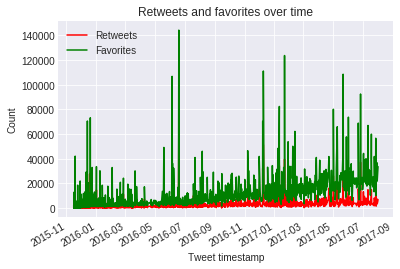

In [195]:
time_data_df['retweet_count'].plot(color = 'red', label='Retweets')
time_data_df['favorite_count'].plot(color = 'green', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.show()

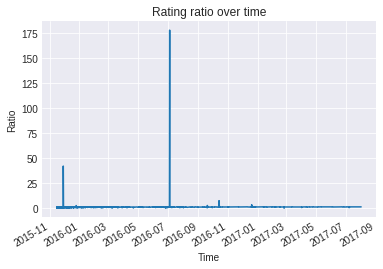

In [196]:
time_data_df['rating_ratio'].plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio.png')
plt.show()

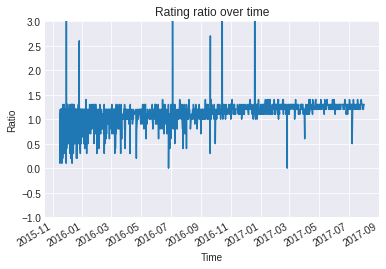

In [197]:
# Limit y axis to zoom in on data and ignore outliers

time_data_df['rating_ratio'].plot()
plt.ylim(-1, 3)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.show()